## 1 - Planejamento

        *Definir Problema de Negócio ou Pergunta Inicial
        *Definir Modelo (Regressão)
        *Definir Métrica de Performance

## 2 - Importando Base de Dados

In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv('housing.csv')

In [3]:
#housing # -> Visualizar os Dados

In [4]:
# Instancias Iniciais para Conhecimento Geral dos Dados

housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
# Informação sobre os dados

housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
# Descrição dos Dados

housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

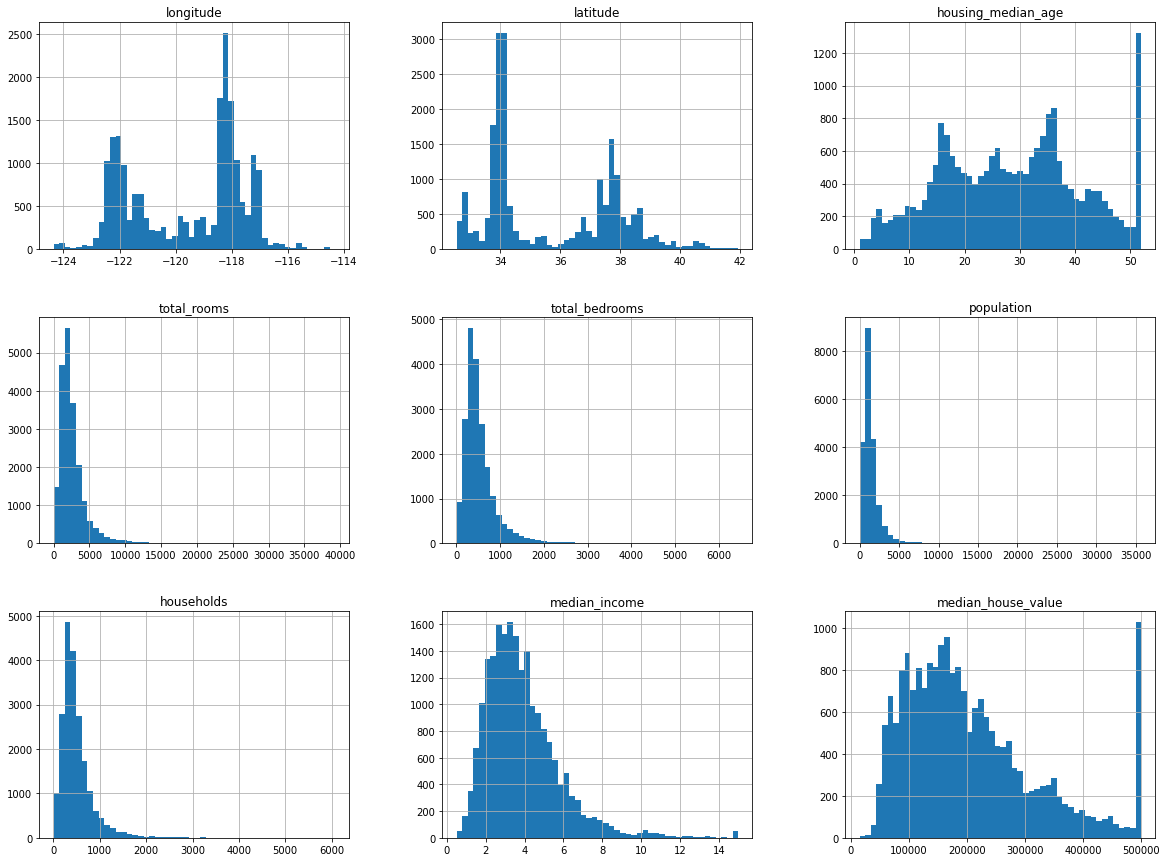

In [7]:
# Histograma dos Dados

housing.hist(bins=50 , figsize=(20,15))

## 3 - Preparando a Base de Dados

In [8]:
from sklearn.model_selection import train_test_split
import numpy as np

In [9]:
# Criando uma Nova Categoria (Coluna) com as Classes Baseado na Média de Rendimentos (Feature Engineering)

housing["income_cat"] = pd.cut(housing["median_income"], bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1,2,3,4,5])

<AxesSubplot:>

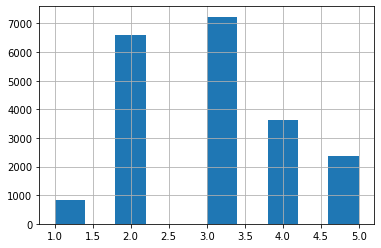

In [10]:
housing["income_cat"].hist()

In [11]:
housing["income_cat"].value_counts(normalize=True)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [12]:
# Separando Dados em Treino e Teste - stratify = para preservar o balanço entre os dados

strat_train_set, strat_test_set = train_test_split(housing, random_state=42, test_size=0.2, stratify=housing["income_cat"])

In [13]:
# Tirando a coluna 'income_cat', que foi feita apenas para equilibrio dos dados

strat_test_set = strat_test_set.drop('income_cat' , axis=1)

In [14]:
strat_train_set = strat_train_set.drop('income_cat' , axis=1)

In [15]:
strat_test_set.ocean_proximity.value_counts()

<1H OCEAN     1859
INLAND        1289
NEAR OCEAN     534
NEAR BAY       443
ISLAND           3
Name: ocean_proximity, dtype: int64

## 4 - Análise Exploratória de Dados

### 4.1 - Gráficos

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

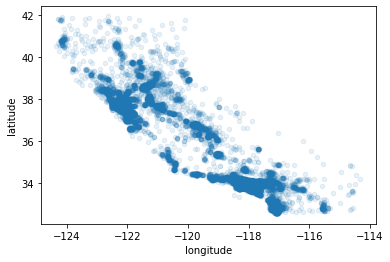

In [16]:
# Scatter Plot da Latitude e Longitude. alpha - deixa os dados transparentes

strat_train_set.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

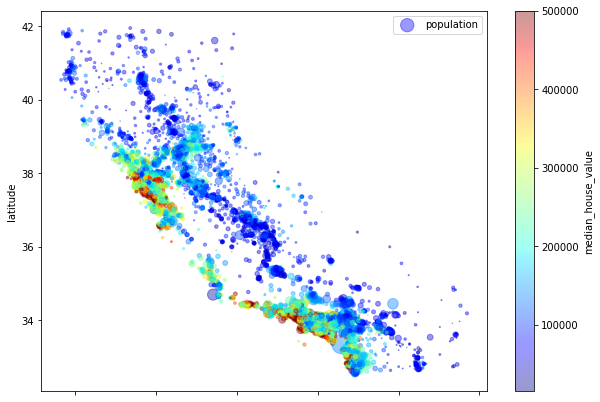

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

strat_train_set.plot(kind="scatter", 
                    x="longitude", 
                    y="latitude", 
                    alpha=0.4, 
                    s=strat_train_set["population"]/100, 
                    label="population", 
                    figsize=(10,7), 
                    c="median_house_value", 
                    cmap=plt.get_cmap("jet"), 
                    colorbar=True,)


In [21]:
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]

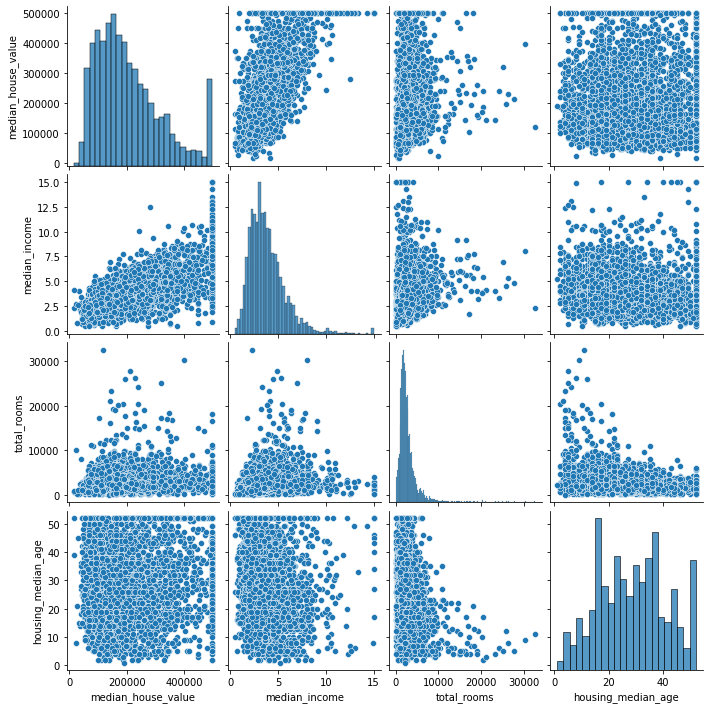

In [22]:
sns.pairplot(strat_test_set[attributes])

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

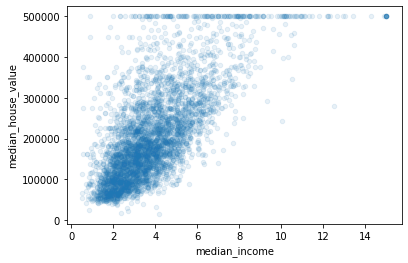

In [23]:
# 
strat_test_set.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

### 4.2 - Corelações

In [24]:
strat_train_set.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105823,0.048909,0.076686,0.108071,0.063146,-0.019615,-0.047466
latitude,-0.924478,1.000000,0.005737,-0.039245,-0.072550,-0.115290,-0.077765,-0.075146,-0.142673
housing_median_age,-0.105823,0.005737,1.000000,-0.364535,-0.325101,-0.298737,-0.306473,-0.111315,0.114146
total_rooms,0.048909,-0.039245,-0.364535,1.000000,0.929391,0.855103,0.918396,0.200133,0.135140
total_bedrooms,0.076686,-0.072550,-0.325101,0.929391,1.000000,0.876324,0.980167,-0.009643,0.047781
population,0.108071,-0.115290,-0.298737,0.855103,0.876324,1.000000,0.904639,0.002421,-0.026882
households,0.063146,-0.077765,-0.306473,0.918396,0.980167,0.904639,1.000000,0.010869,0.064590
median_income,-0.019615,-0.075146,-0.111315,0.200133,-0.009643,0.002421,0.010869,1.000000,0.687151
median_house_value,-0.047466,-0.142673,0.114146,0.135140,0.047781,-0.026882,0.064590,0.687151,1.000000


<AxesSubplot:>

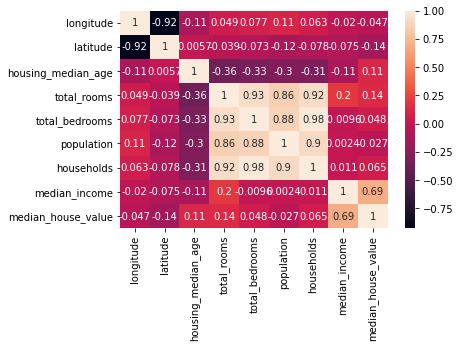

In [25]:
#
sns.heatmap(strat_train_set.corr() , annot=True)

### Feature Engineering for Training 

In [26]:
# Feature Engineering 
strat_train_set["rooms_per_household"]= strat_train_set["total_rooms"]/strat_train_set["households"]

In [27]:
strat_train_set["bedrooms_per_room"]= strat_train_set["total_bedrooms"]/strat_train_set["total_rooms"]

In [28]:
strat_train_set["population_per_household"]= strat_train_set["population"]/strat_train_set["households"]

### Feature Engineering for Test

In [29]:
strat_test_set["rooms_per_household"]= strat_test_set["total_rooms"]/strat_test_set["households"]

In [30]:
strat_test_set["bedrooms_per_room"]= strat_test_set["total_bedrooms"]/strat_test_set["total_rooms"]

In [31]:
strat_test_set["population_per_household"]= strat_test_set["population"]/strat_test_set["households"]

In [32]:
# Ver as corrrelações de "median_house_value" em ordem Decrescente

strat_train_set.corr()["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

## 5 - Machine Learning 

### 5.1 - Preparação dos Dados

In [33]:
strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,5.485836,0.205784,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,6.927083,0.160714,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND,5.393333,0.191595,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN,3.886128,0.276505,1.859213
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN,6.096552,0.182692,3.167241


### Treino

In [34]:
#
y_train = strat_train_set['median_house_value']

In [35]:
#
x_train = strat_train_set.drop('median_house_value', axis=1)

### Teste

In [36]:
#
y_test = strat_test_set['median_house_value']

In [37]:
#
x_test = strat_test_set.drop('median_house_value', axis=1)

In [38]:
x_train.shape

(16512, 12)

In [39]:
x_test.shape

(4128, 12)

### Tratamento de Dados Ausentes - Numéricos

In [40]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12655 to 19773
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 16512 non-null  float64
 1   latitude                  16512 non-null  float64
 2   housing_median_age        16512 non-null  float64
 3   total_rooms               16512 non-null  float64
 4   total_bedrooms            16354 non-null  float64
 5   population                16512 non-null  float64
 6   households                16512 non-null  float64
 7   median_income             16512 non-null  float64
 8   ocean_proximity           16512 non-null  object 
 9   rooms_per_household       16512 non-null  float64
 10  bedrooms_per_room         16354 non-null  float64
 11  population_per_household  16512 non-null  float64
dtypes: float64(11), object(1)
memory usage: 1.6+ MB


In [41]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4128 entries, 5241 to 3965
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 4128 non-null   float64
 1   latitude                  4128 non-null   float64
 2   housing_median_age        4128 non-null   float64
 3   total_rooms               4128 non-null   float64
 4   total_bedrooms            4079 non-null   float64
 5   population                4128 non-null   float64
 6   households                4128 non-null   float64
 7   median_income             4128 non-null   float64
 8   ocean_proximity           4128 non-null   object 
 9   rooms_per_household       4128 non-null   float64
 10  bedrooms_per_room         4079 non-null   float64
 11  population_per_household  4128 non-null   float64
dtypes: float64(11), object(1)
memory usage: 419.2+ KB


In [42]:
# Médiana dos Dados 
x_train.median()

longitude                   -118.510000
latitude                      34.260000
housing_median_age            29.000000
total_rooms                 2119.000000
total_bedrooms               433.000000
population                  1164.000000
households                   408.000000
median_income                  3.541550
rooms_per_household            5.232342
bedrooms_per_room              0.203027
population_per_household       2.817661
dtype: float64

In [43]:
x_train = x_train.fillna(x_train.median())

In [44]:
x_test = x_test.fillna(x_train.median())

In [45]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12655 to 19773
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 16512 non-null  float64
 1   latitude                  16512 non-null  float64
 2   housing_median_age        16512 non-null  float64
 3   total_rooms               16512 non-null  float64
 4   total_bedrooms            16512 non-null  float64
 5   population                16512 non-null  float64
 6   households                16512 non-null  float64
 7   median_income             16512 non-null  float64
 8   ocean_proximity           16512 non-null  object 
 9   rooms_per_household       16512 non-null  float64
 10  bedrooms_per_room         16512 non-null  float64
 11  population_per_household  16512 non-null  float64
dtypes: float64(11), object(1)
memory usage: 1.6+ MB


In [46]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4128 entries, 5241 to 3965
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 4128 non-null   float64
 1   latitude                  4128 non-null   float64
 2   housing_median_age        4128 non-null   float64
 3   total_rooms               4128 non-null   float64
 4   total_bedrooms            4128 non-null   float64
 5   population                4128 non-null   float64
 6   households                4128 non-null   float64
 7   median_income             4128 non-null   float64
 8   ocean_proximity           4128 non-null   object 
 9   rooms_per_household       4128 non-null   float64
 10  bedrooms_per_room         4128 non-null   float64
 11  population_per_household  4128 non-null   float64
dtypes: float64(11), object(1)
memory usage: 419.2+ KB


### Tratamento de Dados Ausentes - Categórico com one_hot encoding ou get_dummies -> Mesma função

In [48]:
x_train = pd.get_dummies(x_train)

In [49]:
x_test = pd.get_dummies(x_test)

In [50]:
x_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,5.485836,0.205784,3.168555,0,1,0,0,0
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,6.927083,0.160714,2.623698,0,0,0,0,1
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,5.393333,0.191595,2.223333,0,1,0,0,0
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,3.886128,0.276505,1.859213,0,0,0,0,1
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,6.096552,0.182692,3.167241,1,0,0,0,0


In [51]:
x_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,6.715625,0.156972,2.275000,1,0,0,0,0
17352,-120.42,34.89,24.0,2020.0,307.0,855.0,283.0,5.0099,7.137809,0.151980,3.021201,1,0,0,0,0
3505,-118.45,34.25,36.0,1453.0,270.0,808.0,275.0,4.3839,5.283636,0.185822,2.938182,1,0,0,0,0
7777,-118.10,33.91,35.0,1653.0,325.0,1072.0,301.0,3.2708,5.491694,0.196612,3.561462,1,0,0,0,0
14155,-117.07,32.77,38.0,3779.0,614.0,1495.0,614.0,4.3529,6.154723,0.162477,2.434853,0,0,0,0,1


### Escalando Colunas com Valores Numéricos - Feature Scaling - Existem várias estratégias

In [52]:
x_train.columns[:-5]

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'rooms_per_household', 'bedrooms_per_room', 'population_per_household'],
      dtype='object')

In [53]:
# Guardando em memória apenas os atributos numéricos - Para facilitar
num_attributes = x_train.columns[:-5]

### Aplicando o Robust Scaler

In [54]:
from sklearn.preprocessing import RobustScaler

In [57]:
transformer = RobustScaler()

In [59]:
transformer.fit(x_train[num_attributes])

RobustScaler()

In [60]:
#RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True, with_scaling=True)

RobustScaler()

In [61]:
x_train[num_attributes] = transformer.transform(x_train[num_attributes])

In [62]:
x_train[num_attributes].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household
12655,-0.778364,1.126984,0.000000,1.032980,1.055072,1.147594,0.922601,-0.627968,0.157041,0.043256,0.412784
15502,0.337731,-0.309524,-1.157895,1.885159,1.223188,0.910160,1.114551,1.283411,1.049900,-0.663966,-0.228174
2908,-0.139842,0.293651,0.789474,-0.295053,-0.356522,-0.531551,-0.334365,-0.305985,0.099735,-0.179397,-0.699153
14053,0.364116,-0.399471,-0.263158,-0.142521,0.249275,-0.284492,0.232198,-0.603730,-0.833985,1.153007,-1.127496
20496,-0.050132,0.005291,-0.105263,0.834511,0.617391,0.719786,0.532508,0.438331,0.535382,-0.319090,0.411238


<AxesSubplot:>

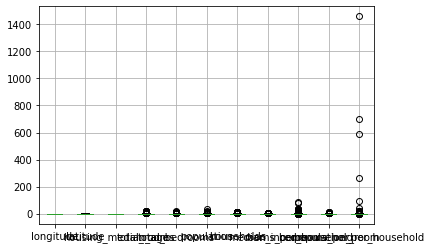

In [64]:
x_train[num_attributes].boxplot()

### Filtrando Outliers

<AxesSubplot:>

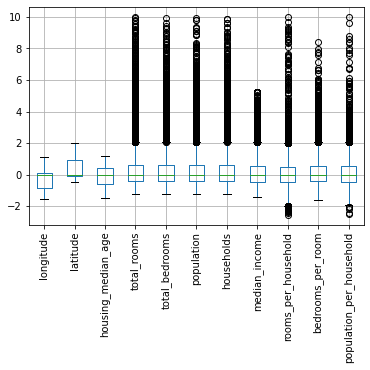

In [66]:
filter_outliers = x_train[num_attributes]<10
x_train[num_attributes][filter_outliers].boxplot(rot=90)

In [67]:
x_test[num_attributes] = transformer.transform(x_test[num_attributes])

In [68]:
x_test[num_attributes].describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household
count,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000
mean,-0.273346,0.355040,-0.021904,0.335487,0.334308,0.304422,0.314709,0.141513,0.093566,0.165562,0.176148
std,0.530449,0.562934,0.664726,1.381624,1.310142,1.280390,1.262160,0.862722,1.129167,0.941523,1.864159
min,-1.496042,-0.452381,-1.473684,-1.246761,-1.252174,-1.239572,-1.260062,-1.396293,-2.717264,-1.616686,-2.033221
25%,-0.862797,-0.089947,-0.578947,-0.379859,-0.377536,-0.383155,-0.386997,-0.458541,-0.494407,-0.418731,-0.462293
50%,0.013193,-0.010582,-0.052632,0.023852,0.014493,0.009091,0.024768,-0.013014,-0.008694,0.000549,0.005467
75%,0.139842,0.907407,0.421053,0.619700,0.631884,0.631283,0.635449,0.549802,0.495216,0.565861,0.551571
max,1.042216,2.034392,1.210526,17.967020,17.426087,29.306952,17.566563,5.260137,19.719548,12.505987,71.679384


### 5.2 Seleção e Treinamento de Modelos

### 5.3 - Linear Regression

In [70]:
from sklearn.linear_model import LinearRegression

In [77]:
lin_reg = LinearRegression()

In [78]:
lin_reg.fit(x_train , y_train)

LinearRegression()

In [79]:
lin_reg.predict(x_test.head(10))

array([429417.55911598, 286174.30279663, 239250.12101832, 188281.11601615,
       258941.0516492 , 216756.79491618, 156301.95544824, 370660.65372883,
       300099.81245012, 223092.86084675])

### Calculando o Erro

In [80]:
from sklearn.metrics import mean_squared_error

In [85]:
# Calculo do Erro em Dollars
np.sqrt(mean_squared_error(y_test.head(10).values, lin_reg.predict(x_test.head(10))))

84408.02976218953

In [89]:
y_pred_train = lin_reg.predict(x_train)

In [90]:
y_pred_train[:5]

array([ 83648.54287152, 305815.0882093 , 150013.37994426, 188096.42566946,
       241840.13952577])

In [91]:
y_train[:5]

12655     72100.0
15502    279600.0
2908      82700.0
14053    112500.0
20496    238300.0
Name: median_house_value, dtype: float64

In [92]:
lin_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
lin_rmse

68160.92435491859

### 5.4 - Decision Tree

In [94]:
from sklearn.tree import DecisionTreeRegressor

In [95]:
tree_reg = DecisionTreeRegressor()

In [96]:
tree_reg.fit(x_train, y_train)

DecisionTreeRegressor()

In [97]:
y_pred_train = tree_reg.predict(x_train)

In [98]:
tree_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
tree_rmse

0.0

In [99]:
y_pred_test = tree_reg.predict(x_test)
np.sqrt(mean_squared_error(y_test, y_pred_test))

69599.00743330197

### Cross Validation - Melhorando as Estimativas

In [100]:
from sklearn.model_selection import cross_val_score

In [102]:
scores = cross_val_score(tree_reg, x_train, y_train, scoring="neg_mean_squared_error", cv=10)

In [105]:
# Salvando as Métricas na Variável
tree_rmse_scores = np.sqrt(-scores)

In [106]:
# Pegando a media dos Scores
np.mean(tree_rmse_scores)

71090.99427420682

In [107]:
# Desvio Padrão
np.std(tree_rmse_scores)

2245.6643506452665

In [ ]:
# Replicando para Regressão Linear

In [108]:
scores = cross_val_score(lin_reg, x_train, y_train, scoring="neg_mean_squared_error", cv=10)

In [109]:
lin_reg_rmse_scores = np.sqrt(-scores)

In [110]:
np.mean(lin_reg_rmse_scores)

68439.7214102642

In [111]:
np.std(lin_reg_rmse_scores)

2408.8928462974727

### 5.4 - Random Forest

In [112]:
from sklearn.ensemble import RandomForestRegressor

In [114]:
rf = RandomForestRegressor()

In [115]:
rf.fit(x_train, y_train)

RandomForestRegressor()

In [116]:
#Verificando o Erro
np.sqrt(mean_squared_error(y_train, rf.predict(x_train)))

18713.39587061132

In [118]:
# Cross Validation para o Random Forest
scores = cross_val_score(rf, x_train, y_train, scoring="neg_mean_squared_error", cv=10)

In [119]:
rf_reg_rmse_scores = np.sqrt(-scores)

In [120]:
np.mean(rf_reg_rmse_scores)

50321.045455150204

In [121]:
np.std(rf_reg_rmse_scores)

2321.4769705784297

### 5.5 Calibração de Modelos

In [122]:
from sklearn.model_selection import GridSearchCV

In [123]:
from sklearn.ensemble import RandomForestRegressor

In [124]:
rf = RandomForestRegressor()

In [125]:
param_grid = {'n_estimators': [3, 10, 30], 
               'max_features': [2, 4, 6, 8]}

In [126]:
grid_search = GridSearchCV(rf, param_grid, scoring='neg_mean_squared_error', return_train_score=True)

In [127]:
grid_search.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [128]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [130]:
rf_calibrate = grid_search.best_estimator_
rf_calibrate

RandomForestRegressor(max_features=6, n_estimators=30)

In [132]:
np.sqrt(-grid_search.best_score_)

49709.397649234765

## 6 - Comunicação dos Resultados

## 7 - Deploy